<a href="https://colab.research.google.com/github/jaicdev/Jetson_configuration/blob/main/CIFAR10%20Using%20LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader

In [ ]:
seed_value = 42  # Set the desired seed value
np.random.seed(seed_value)

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# Define transformations for CIFAR dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(400, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [ ]:
# Load CIFAR training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# Load CIFAR test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:06<00:00, 28390223.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
trainloader_length = len(trainset)
print("Length of trainloader:", trainloader_length)

Length of trainloader: 50000


In [ ]:
batchSize = 256

# Split the original trainloader into trainset and validateset
train, validate = random_split(trainset, [45000, 5000])

# Create new DataLoader objects for trainset, validateset, and testset
traindata = DataLoader(train, batch_size=batchSize, shuffle=True)
validatedata = DataLoader(validate, batch_size=batchSize, shuffle=True)
testLoader = DataLoader(testset, batch_size=batchSize, shuffle=False)

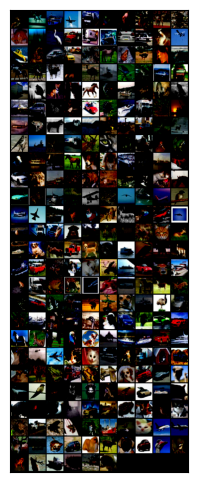

In [ ]:
for images, labels in traindata:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))
    break

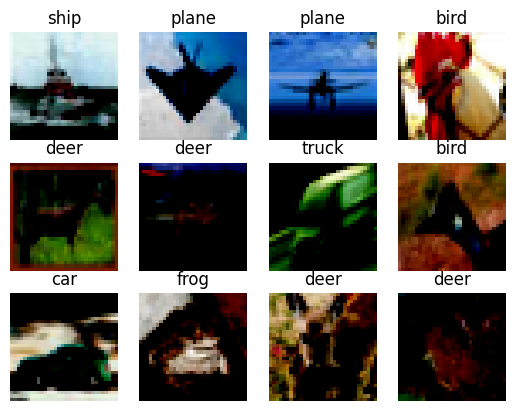

In [ ]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

for i in range(0, 12):
    img, label = train[i]
    plt.subplot(3,4,i+1)
    plt.title(classes[label])
    plt.axis('off')
    plt.imshow(img.permute(1, 2, 0))

In [ ]:
# Choose the model to train
model = LeNet()

print(model)

# Move model to the device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9) #use momentum=0.9 ig SGD is used

LeNet(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
    (5): ReLU()
  )
)


100%|██████████| 176/176 [00:14<00:00, 12.19it/s]


Epoch [1/50], Train Loss: 2.0392, Train Acc: 0.2521, Val Loss: 1.7386, Val Acc: 0.3734


100%|██████████| 176/176 [00:13<00:00, 12.81it/s]


Epoch [2/50], Train Loss: 1.5775, Train Acc: 0.4362, Val Loss: 1.3996, Val Acc: 0.4992


100%|██████████| 176/176 [00:13<00:00, 13.00it/s]


Epoch [3/50], Train Loss: 1.3120, Train Acc: 0.5324, Val Loss: 1.3315, Val Acc: 0.5366


100%|██████████| 176/176 [00:13<00:00, 12.81it/s]


Epoch [4/50], Train Loss: 1.1962, Train Acc: 0.5756, Val Loss: 1.1743, Val Acc: 0.5828


100%|██████████| 176/176 [00:14<00:00, 12.22it/s]


Epoch [5/50], Train Loss: 1.0873, Train Acc: 0.6143, Val Loss: 1.1608, Val Acc: 0.5930


100%|██████████| 176/176 [00:13<00:00, 12.80it/s]


Epoch [6/50], Train Loss: 1.0238, Train Acc: 0.6356, Val Loss: 1.1566, Val Acc: 0.5948


100%|██████████| 176/176 [00:13<00:00, 12.88it/s]


Epoch [7/50], Train Loss: 0.9760, Train Acc: 0.6534, Val Loss: 1.2136, Val Acc: 0.5840


100%|██████████| 176/176 [00:13<00:00, 12.95it/s]


Epoch [8/50], Train Loss: 0.9174, Train Acc: 0.6736, Val Loss: 1.1694, Val Acc: 0.6018


100%|██████████| 176/176 [00:13<00:00, 12.91it/s]


Epoch [9/50], Train Loss: 0.8619, Train Acc: 0.6940, Val Loss: 1.2288, Val Acc: 0.6022


100%|██████████| 176/176 [00:13<00:00, 13.09it/s]


Epoch [10/50], Train Loss: 0.8386, Train Acc: 0.7050, Val Loss: 1.2631, Val Acc: 0.5966


100%|██████████| 176/176 [00:13<00:00, 13.27it/s]


Epoch [11/50], Train Loss: 0.8141, Train Acc: 0.7127, Val Loss: 1.3365, Val Acc: 0.5774


100%|██████████| 176/176 [00:13<00:00, 13.00it/s]


Epoch [12/50], Train Loss: 0.7776, Train Acc: 0.7250, Val Loss: 1.4043, Val Acc: 0.5722


100%|██████████| 176/176 [00:13<00:00, 12.99it/s]


Epoch [13/50], Train Loss: 0.7474, Train Acc: 0.7365, Val Loss: 1.4055, Val Acc: 0.5874


100%|██████████| 176/176 [00:13<00:00, 12.58it/s]


Epoch [14/50], Train Loss: 0.7195, Train Acc: 0.7467, Val Loss: 1.4397, Val Acc: 0.5912


100%|██████████| 176/176 [00:13<00:00, 13.36it/s]


Epoch [15/50], Train Loss: 0.7059, Train Acc: 0.7516, Val Loss: 1.4914, Val Acc: 0.5688


100%|██████████| 176/176 [00:13<00:00, 13.09it/s]


Epoch [16/50], Train Loss: 0.7176, Train Acc: 0.7486, Val Loss: 1.4706, Val Acc: 0.5874


100%|██████████| 176/176 [00:13<00:00, 13.24it/s]


Epoch [17/50], Train Loss: 0.6996, Train Acc: 0.7602, Val Loss: 1.4994, Val Acc: 0.5874


100%|██████████| 176/176 [00:13<00:00, 13.08it/s]


Epoch [18/50], Train Loss: 0.6561, Train Acc: 0.7736, Val Loss: 1.6594, Val Acc: 0.5698


100%|██████████| 176/176 [00:13<00:00, 12.99it/s]


Epoch [19/50], Train Loss: 0.6852, Train Acc: 0.7646, Val Loss: 1.5776, Val Acc: 0.5732


100%|██████████| 176/176 [00:13<00:00, 13.11it/s]


Epoch [20/50], Train Loss: 0.6925, Train Acc: 0.7636, Val Loss: 1.6711, Val Acc: 0.5672


100%|██████████| 176/176 [00:13<00:00, 13.21it/s]


Epoch [21/50], Train Loss: 0.6835, Train Acc: 0.7713, Val Loss: 1.7338, Val Acc: 0.5686


100%|██████████| 176/176 [00:13<00:00, 13.22it/s]


Epoch [22/50], Train Loss: 0.6637, Train Acc: 0.7771, Val Loss: 1.7529, Val Acc: 0.5680


100%|██████████| 176/176 [00:13<00:00, 13.02it/s]


Epoch [23/50], Train Loss: 0.6372, Train Acc: 0.7852, Val Loss: 1.7810, Val Acc: 0.5776


100%|██████████| 176/176 [00:13<00:00, 12.92it/s]


Epoch [24/50], Train Loss: 0.6837, Train Acc: 0.7743, Val Loss: 1.9209, Val Acc: 0.5634


100%|██████████| 176/176 [00:13<00:00, 13.20it/s]


Epoch [25/50], Train Loss: 0.6714, Train Acc: 0.7785, Val Loss: 1.9410, Val Acc: 0.5612


100%|██████████| 176/176 [00:13<00:00, 13.15it/s]


Epoch [26/50], Train Loss: 0.6715, Train Acc: 0.7797, Val Loss: 1.9112, Val Acc: 0.5500


100%|██████████| 176/176 [00:13<00:00, 12.95it/s]


Epoch [27/50], Train Loss: 0.6753, Train Acc: 0.7813, Val Loss: 1.9315, Val Acc: 0.5682


100%|██████████| 176/176 [00:14<00:00, 12.38it/s]


Epoch [28/50], Train Loss: 0.6380, Train Acc: 0.7922, Val Loss: 1.8072, Val Acc: 0.5630


100%|██████████| 176/176 [00:13<00:00, 12.81it/s]


Epoch [29/50], Train Loss: 0.6676, Train Acc: 0.7867, Val Loss: 2.0298, Val Acc: 0.5446


100%|██████████| 176/176 [00:13<00:00, 12.99it/s]


Epoch [30/50], Train Loss: 0.7144, Train Acc: 0.7740, Val Loss: 1.9831, Val Acc: 0.5462


100%|██████████| 176/176 [00:13<00:00, 13.23it/s]


Epoch [31/50], Train Loss: 0.6571, Train Acc: 0.7920, Val Loss: 1.9681, Val Acc: 0.5590


100%|██████████| 176/176 [00:14<00:00, 12.43it/s]


Epoch [32/50], Train Loss: 0.6860, Train Acc: 0.7839, Val Loss: 1.9288, Val Acc: 0.5610


100%|██████████| 176/176 [00:13<00:00, 12.77it/s]


Epoch [33/50], Train Loss: 0.7086, Train Acc: 0.7778, Val Loss: 2.0537, Val Acc: 0.5538


100%|██████████| 176/176 [00:14<00:00, 12.38it/s]


Epoch [34/50], Train Loss: 0.7012, Train Acc: 0.7841, Val Loss: 2.0295, Val Acc: 0.5536


100%|██████████| 176/176 [00:13<00:00, 12.80it/s]


Epoch [35/50], Train Loss: 0.6946, Train Acc: 0.7834, Val Loss: 2.0376, Val Acc: 0.5530


100%|██████████| 176/176 [00:14<00:00, 12.04it/s]


Epoch [36/50], Train Loss: 0.7222, Train Acc: 0.7769, Val Loss: 2.0984, Val Acc: 0.5586


100%|██████████| 176/176 [00:14<00:00, 12.34it/s]


Epoch [37/50], Train Loss: 0.6659, Train Acc: 0.7930, Val Loss: 2.1860, Val Acc: 0.5402


100%|██████████| 176/176 [00:14<00:00, 12.42it/s]


Epoch [38/50], Train Loss: 0.7241, Train Acc: 0.7796, Val Loss: 2.1735, Val Acc: 0.5382


100%|██████████| 176/176 [00:14<00:00, 12.33it/s]


Epoch [39/50], Train Loss: 0.7692, Train Acc: 0.7662, Val Loss: 2.1802, Val Acc: 0.5500


100%|██████████| 176/176 [00:13<00:00, 12.91it/s]


Epoch [40/50], Train Loss: 0.7675, Train Acc: 0.7711, Val Loss: 2.1562, Val Acc: 0.5546


100%|██████████| 176/176 [00:13<00:00, 12.78it/s]


Epoch [41/50], Train Loss: 0.7402, Train Acc: 0.7770, Val Loss: 2.0004, Val Acc: 0.5374


100%|██████████| 176/176 [00:13<00:00, 12.80it/s]


Epoch [42/50], Train Loss: 0.7914, Train Acc: 0.7637, Val Loss: 2.2069, Val Acc: 0.5268


100%|██████████| 176/176 [00:13<00:00, 12.79it/s]


Epoch [43/50], Train Loss: 0.7386, Train Acc: 0.7816, Val Loss: 2.2199, Val Acc: 0.5634


100%|██████████| 176/176 [00:14<00:00, 12.45it/s]


Epoch [44/50], Train Loss: 0.7387, Train Acc: 0.7817, Val Loss: 2.4609, Val Acc: 0.5328


100%|██████████| 176/176 [00:13<00:00, 12.90it/s]


Epoch [45/50], Train Loss: 0.7887, Train Acc: 0.7684, Val Loss: 2.3163, Val Acc: 0.5420


100%|██████████| 176/176 [00:13<00:00, 12.91it/s]


Epoch [46/50], Train Loss: 0.8351, Train Acc: 0.7603, Val Loss: 2.0382, Val Acc: 0.5326


100%|██████████| 176/176 [00:13<00:00, 13.15it/s]


Epoch [47/50], Train Loss: 0.7953, Train Acc: 0.7651, Val Loss: 2.2000, Val Acc: 0.5466


100%|██████████| 176/176 [00:13<00:00, 12.62it/s]


Epoch [48/50], Train Loss: 0.8615, Train Acc: 0.7494, Val Loss: 2.1231, Val Acc: 0.5210


100%|██████████| 176/176 [00:13<00:00, 12.92it/s]


Epoch [49/50], Train Loss: 0.8467, Train Acc: 0.7546, Val Loss: 2.0849, Val Acc: 0.5428


100%|██████████| 176/176 [00:13<00:00, 12.92it/s]


Epoch [50/50], Train Loss: 0.8192, Train Acc: 0.7646, Val Loss: 2.3056, Val Acc: 0.5532


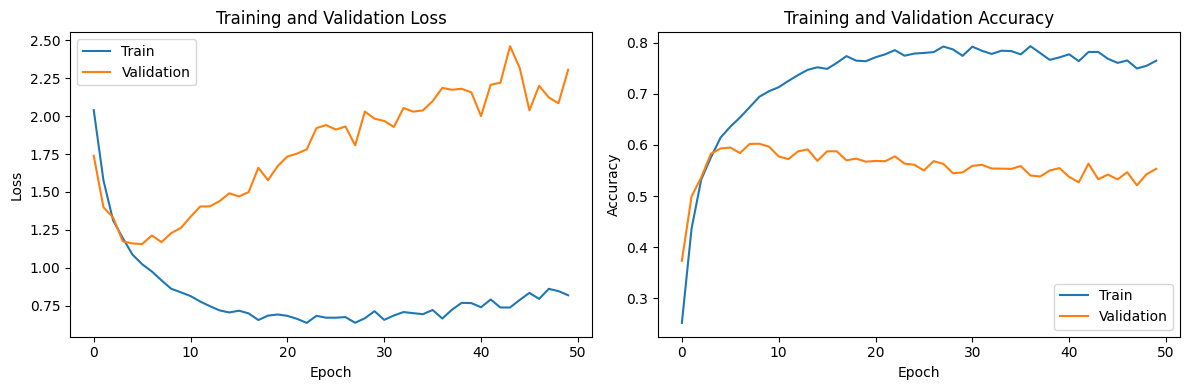

Model weights saved successfully


In [ ]:
num_epochs = 50

# Initialize lists to store losses and accuracies
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Set model to training mode
model.train()

# Training loop
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_correct = 0
    train_total = 0

    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    # Training
    for images, labels in tqdm(traindata):
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update training statistics
        train_running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Calculate training epoch loss and accuracy
    train_epoch_loss = train_running_loss / len(traindata)
    train_epoch_acc = train_correct / train_total

    # Append training losses and accuracies
    train_losses.append(train_epoch_loss)
    train_accs.append(train_epoch_acc)

    # Validation
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for val_images, val_labels in validatedata:
            # Move images and labels to the device
            val_images = val_images.to(device)
            val_labels = val_labels.to(device)

            # Forward pass
            val_outputs = model(val_images)
            val_loss = criterion(val_outputs, val_labels)

            # Update validation statistics
            val_running_loss += val_loss.item()
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate validation epoch loss and accuracy
    val_epoch_loss = val_running_loss / len(validatedata)
    val_epoch_acc = val_correct / val_total

    # Append validation losses and accuracies
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

# Plot losses and accuracies
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(val_accs, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Save model weights
torch.save(model.state_dict(), 'model_weights.pth')

print("Model weights saved successfully")

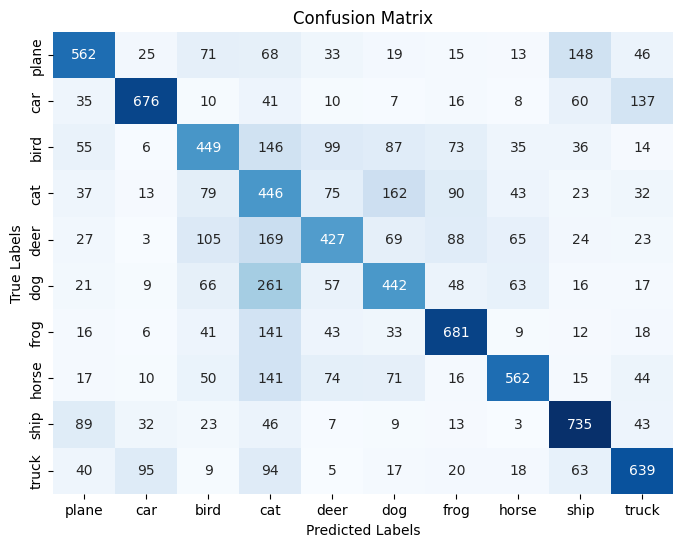

Accuracy of class plane: 0.92
Accuracy of class car: 0.95
Accuracy of class bird: 0.90
Accuracy of class cat: 0.83
Accuracy of class deer: 0.90
Accuracy of class dog: 0.90
Accuracy of class frog: 0.93
Accuracy of class horse: 0.93
Accuracy of class ship: 0.93
Accuracy of class truck: 0.93


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

save_path = '/content/model_weights.pth'

# Load the saved model weights
model.load_state_dict(torch.load(save_path))


# Set the model to evaluation mode
model.eval()

# Initialize variables for storing predictions and ground truth labels
all_predictions = []
all_labels = []
all_images = []

# Disable gradient computation
with torch.no_grad():
    for images, labels in testLoader:
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # Accumulate predictions, labels, and images
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu().numpy())

# Convert predictions, labels, and images to NumPy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
all_images = np.array(all_images)

# Compute the confusion matrix
confusion_mat = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Compute accuracy of each class
class_accuracy = {}
for i, class_name in enumerate(classes):
    class_labels = all_labels == i
    class_predictions = all_predictions == i
    class_accuracy[class_name] = accuracy_score(class_labels, class_predictions)

# Display class accuracies
for class_name, accuracy in class_accuracy.items():
    print(f"Accuracy of class {class_name}: {accuracy:.2f}")


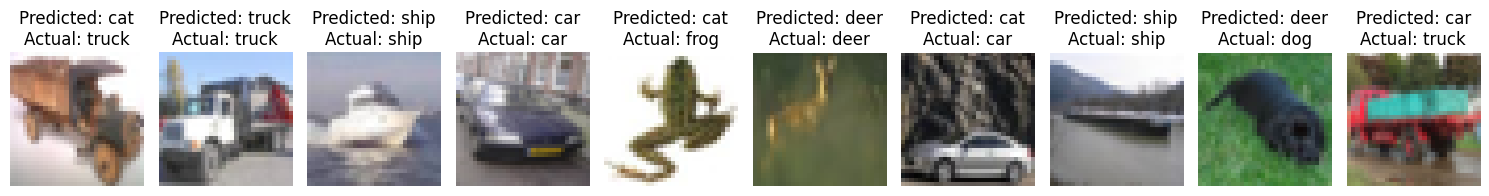

In [ ]:
import random

# Select a random subset of samples
num_samples = 10  # Number of samples to display
random_indices = random.sample(range(len(all_predictions)), num_samples)

# Create a subplot grid
fig, axs = plt.subplots(1, num_samples, figsize=(15, 6))

# Display the samples
for i, idx in enumerate(random_indices):
    predicted_label = classes[all_predictions[idx]]
    actual_label = classes[all_labels[idx]]
    image = all_images[idx]

    # Unnormalize the image data
    image = image / 2 + 0.5

    # Convert the tensor image to NumPy array
    image = np.transpose(image, (1, 2, 0))

    # Display the image
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"Predicted: {predicted_label}\nActual: {actual_label}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
